# DRIVE MOUNTER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#  DATA EXTRACTION

In [0]:
Path="drive/My Drive/iitkgp_summer_project"

In [0]:
import pandas as pd
import numpy as np
import json
import csv
import bz2
import os
import sys

In [0]:
def extractor(fle,writer):
  total=[]
  source_file=bz2.BZ2File(fle,'r')
  prev='ip'
  temp_l=[]
  for i,line in enumerate(source_file):
    if i==200: break
    print(i)
    data=json.loads(line)
    if 'from' not in data.keys() or 'dst_addr' not in data.keys():
      continue
    src_addr=data['from']
    dest_addr=data["dst_addr"]
    temp=data['result']
    for iter in temp:
      if "result" not in iter.keys():
        continue
      data_temp=iter['result']
      for ext in data_temp:
        if "from" in ext.keys():
          if prev==str(ext["from"]): continue
          temp_l.append(ext["from"])
          prev=str(ext["from"])
    if len(temp_l)==0:
      continue
    writer.write(str(src_addr)+","+str(dest_addr)+"\n")
    total.append(temp_l)  
    temp_l=[]
  return total  
          

In [0]:
def merge(name_w,total):
  df=pd.read_csv(name_w)
  df['Hops']=total
  df.to_csv(name_w,index=False)

In [0]:
files=os.listdir(Path)
i=files[0]
name=Path+'/'+i
name_w=Path+'/IP_rec'+i[-7:-4]+".csv"
text=open(name_w,"w")

text.write("source,dest\n")
text.close()
writer=open(name_w,'a')
total=extractor(name,writer)
writer.close()
merge(name_w, total)  

# DATA PREPROCESSING

In [0]:
Path="drive/My Drive/iitkgp_summer_project"

In [0]:
ext='/IP_rec300.csv'

In [0]:
fle=Path+'/IP_rec300.csv'

In [0]:
import pandas as pd
import json
import ast
import os

In [0]:
df=pd.read_csv(fle)
z=0
df_l=df.values.tolist()
data={}
while z<len(df):
  lst=ast.literal_eval(df_l[z][2])
  k=df_l[z][0]
  lst.insert(0,k)
  lst.append(df_l[z][1])
  j=0
  while j<len(lst)-1:
    if data.get(lst[j])==None:
      data[lst[j]]=[lst[j+1]]
    else:
      ips=data.get(lst[j])
      ips.append(lst[j+1])
      data[lst[j]]=ips
      print(ips)
    j+=1
    
  if data.get(lst[j])==None:
    data[lst[j]]=[]
  z+=1


In [0]:
dump=Path+ext[:-4]+'.json'

In [0]:
if os.path.exists(dump):
  os.remove(dump)
with open(dump, 'w') as fp:
    json.dump(data, fp)

# GRAPH CREATION

In [0]:
import json
import pickle

In [0]:
Path="drive/My Drive/iitkgp_summer_project"
fle='/IP_rec300.json'

In [0]:
f=open(Path+fle,"r")
data=json.loads(f.read())

In [0]:
class Graph:
  def __init__(self,g_dict=None):
    if g_dict is None:
      g_dict=[]
    self.g_dict=g_dict

  def getVertices(self):
    return list(self.g_dict.keys())
  
  def findedge(self):
    edge=[]
    for v in self.g_dict:
      for nxt_v in self.g_dict[v]:
        if (nxt_v,v) not in edge:
          edge.append((nxt_v,v))
    return edge
  
  def edges(self):
      return self.findedge()

  def addVertex(self,v):
    if v not in self.g_dict:
      self.g_dict[v]=[]

  def addedge(self,edge):
    edge=set(edge)
    (v1,v2)=tuple(edge)
    if v1 in self.g_dict:
      self.g_dict[v1].append(v2)
    else:
      self.g_dict[v1]=[v2]


In [0]:
graph_elements=data

In [0]:
g=Graph(graph_elements)

In [0]:
edge=g.edges()

In [0]:
ver=g.getVertices()

# PRINTING GRAPH


In [0]:
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
G=nx.Graph()

In [0]:
G.add_nodes_from(ver)
G.add_edges_from(edge)

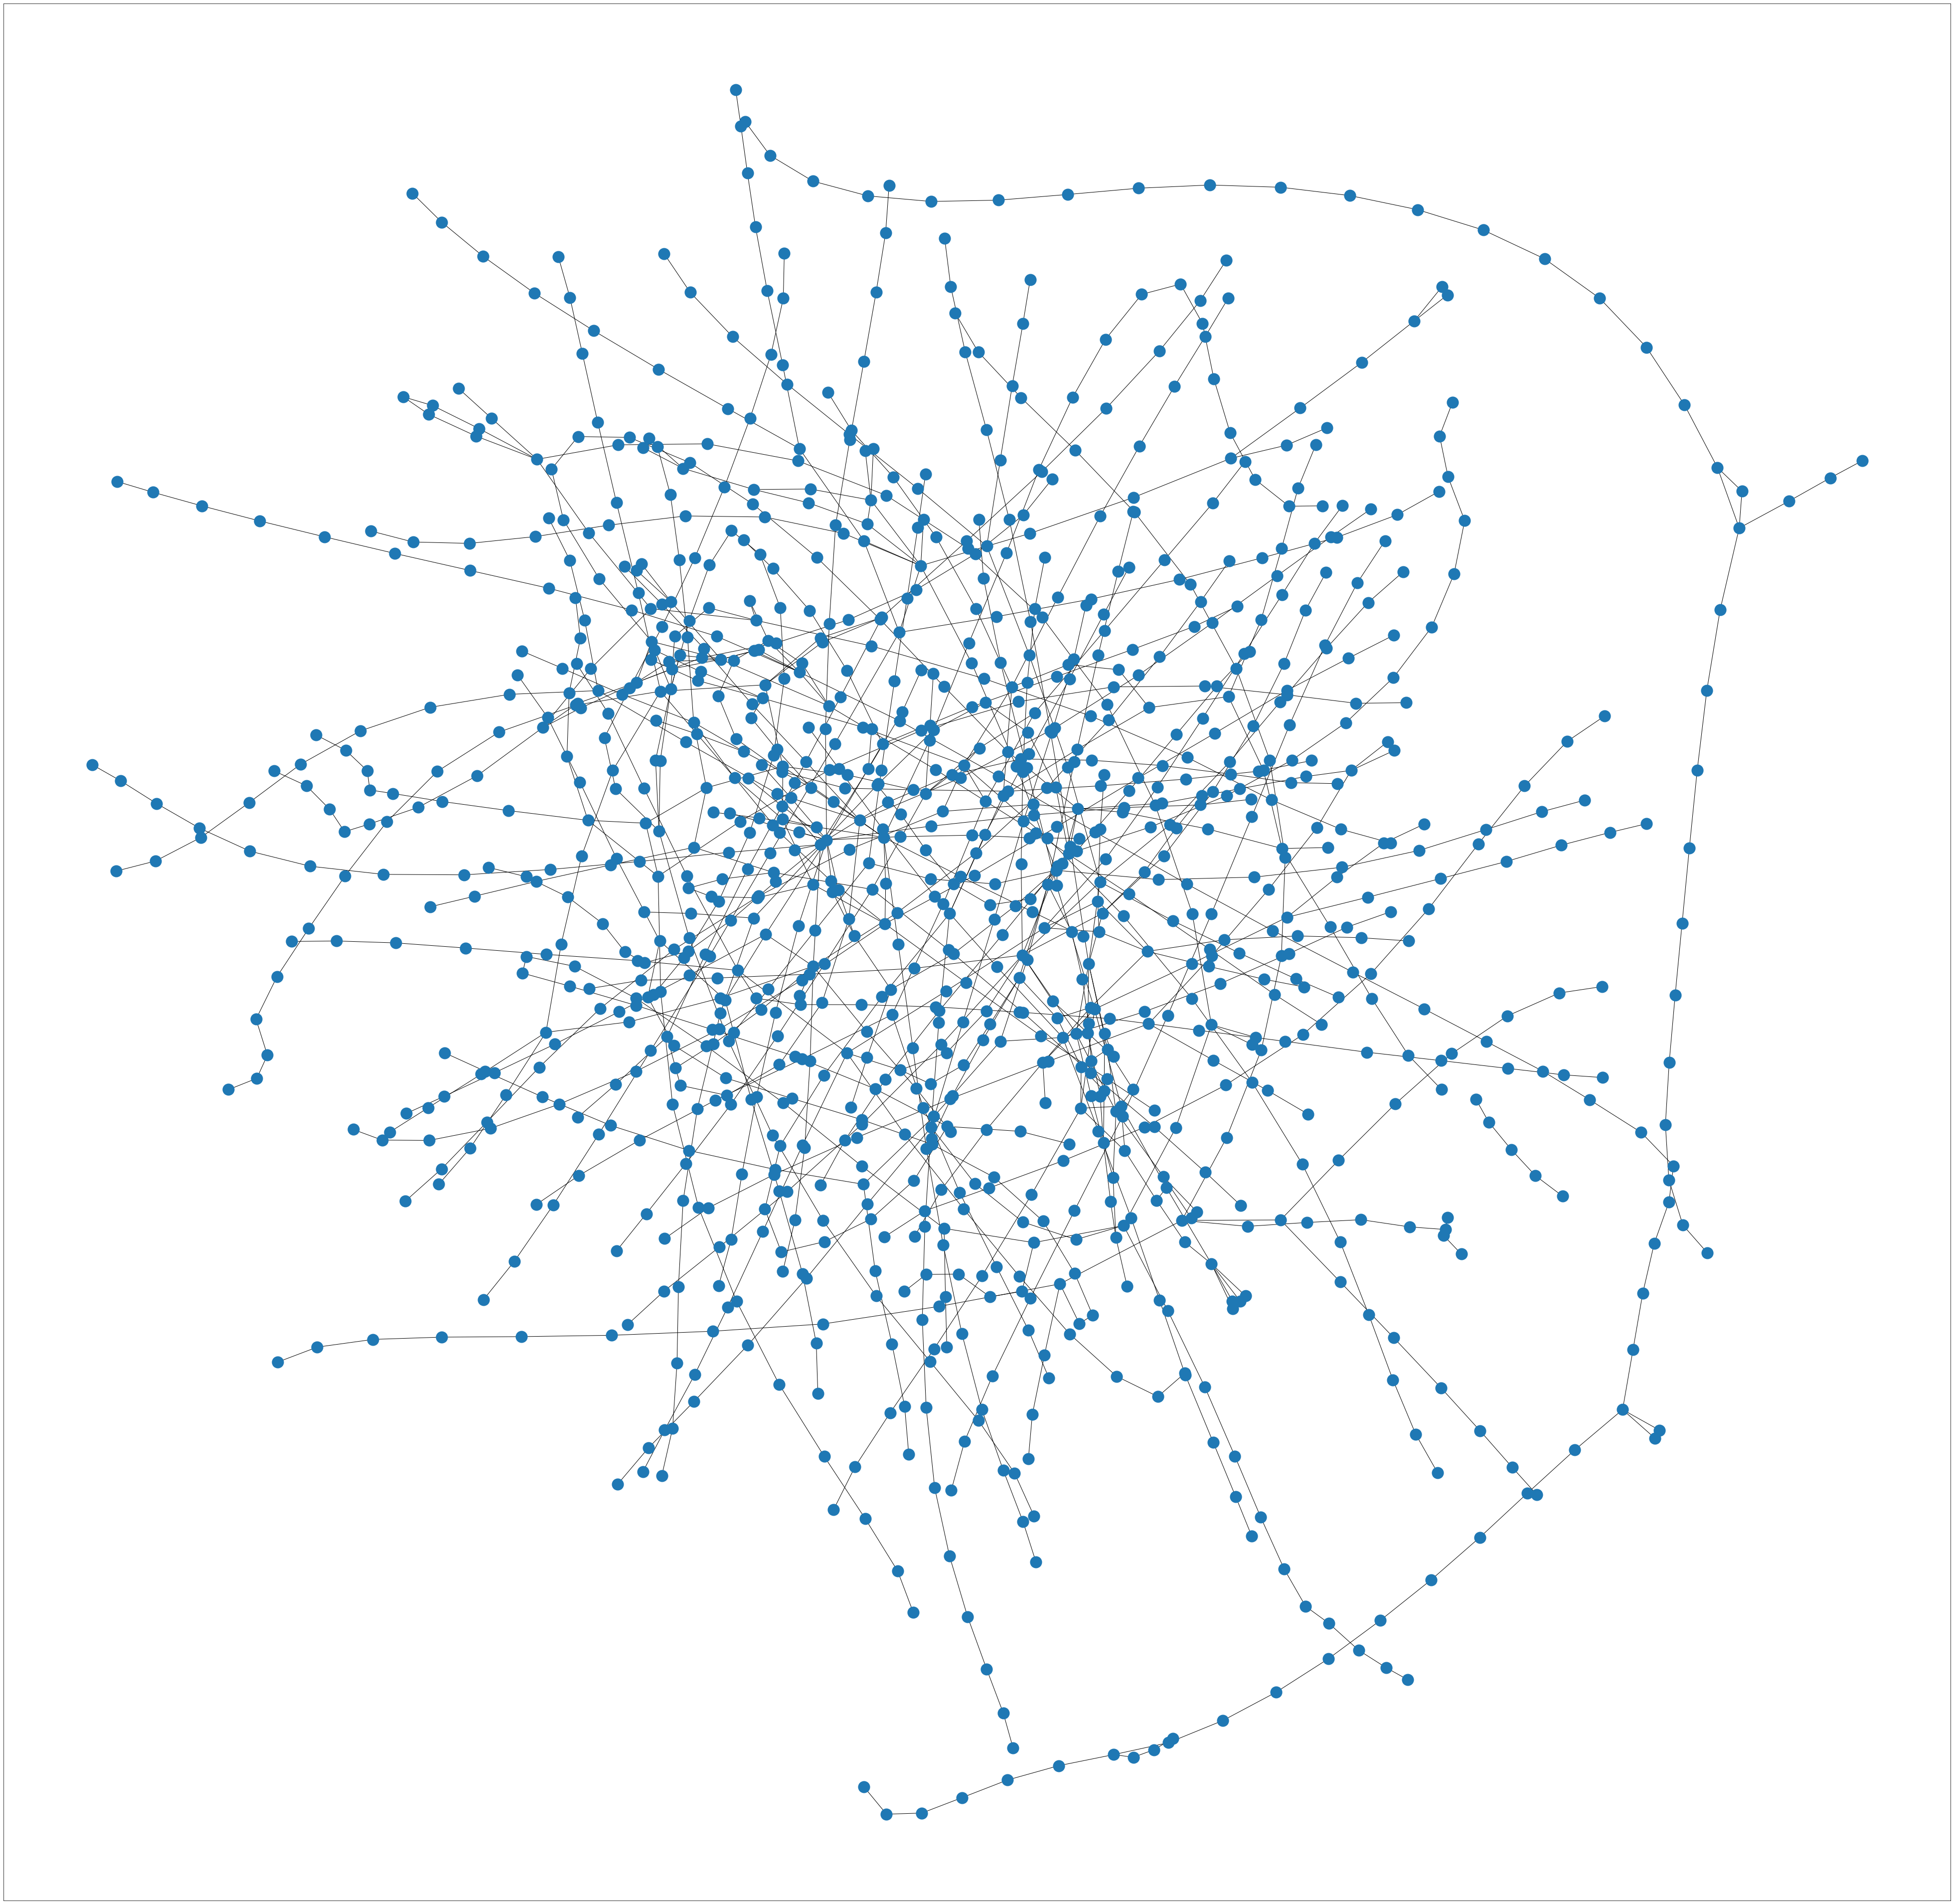

In [0]:
plt.figure(1,figsize=(70,70)) 
nx.draw_networkx(G,with_labels=False,node_size=200,node_shape='o',style='solid',linewidths=10.0)
plt.savefig("drive/My Drive/iitkgp_summer_project/fig_1.png")
#plt.show()

# ANALYSIS FROM GRAPH

In [0]:
import json
import pandas as pd
from cymruwhois import Client
import socket

In [0]:
Path="drive/My Drive/iitkgp_summer_project"
fle='/IP_rec300.json'

In [0]:
def get_number_of_connections(fle,file_w):
  f=open(fle,"r")
  data=json.loads(f.read())
  writer=open(file_w,'a')
  for i in data.keys():
    lst=data.get(i)
    l=len(lst)
    writer.write(i+","+str(l)+"\n")
  writer.close()


In [0]:
ext=fle[:-5]
file_j=Path+fle
file_w=Path+ext+'_IP_details.csv'
writer=open(file_w,'w')
writer.write('IP,connection\n')
writer.close()

get_number_of_connections(file_j,file_w)

In [14]:
df=pd.read_csv(file_w)
df.sort_values(by='connection')

,IP,connection
1087,2001:500:12::d0d,0
800,2a02:6600:2:f::24e,0
364,185.54.144.50,0
931,2a01:5042:100::1:1,0
458,192.16.41.100,0
...,...,...
127,194.149.130.78,22
124,194.149.138.254,22
125,194.149.137.73,22
126,194.149.130.3,22


In [15]:
fle='/IP_rec300.csv'
df2=pd.read_csv(Path+fle)
print(df2.head())

           source  ...                                               Hops
0  222.241.197.97  ...  ['192.168.33.253', '192.168.33.1', '222.241.19...
1  222.241.197.97  ...  ['192.168.33.1', '222.241.196.1', '61.187.99.2...
2  222.241.197.97  ...  ['192.168.33.253', '192.168.33.1', '222.241.19...
3  222.241.197.97  ...  ['192.168.33.253', '192.168.33.1', '222.241.19...
4  222.241.197.97  ...  ['192.168.33.253', '192.168.33.1', '222.241.19...

[5 rows x 3 columns]


In [0]:
i=0
df_l=df2.values.tolist()
source={}
while i<len(df_l):
  if source.get(df_l[i][0]) is None:
    source[df_l[i][0]]=0
  i+=1


In [0]:
k=0
status=[]
while k<len(df):
  if df.iloc[k]['connection']==0:
    status.append('dest')
  elif source.get(df.iloc[k]['IP']) is not None:
    status.append('sender')
  else:
    status.append('Intermediate')
  
  k+=1

df['Status']=status
df.to_csv(file_w,index=False)



In [0]:
df=pd.read_csv(file_w)
c=Client()
asn=[]
as_name=[]

j=0
while j<len(df):
  ip=df.iloc[j]['IP']
  r=c.lookup(ip)

  asn.append(r.asn)
  as_name.append(r.owner)
  j+=1

df['AS_num']=asn
df['AS_name']=as_name
df.to_csv(file_w,index=False)


In [0]:
df=pd.read_csv(file_w)
c=Client()
hn=[]

j=0
while j<len(df):
  ip=df.iloc[j]['IP']
  try:
    h=socket.gethostbyaddr(ip)
    hn.append(h[0])
  except:
    hn.append('NA')
  j+=1
df['host']=hn

df.to_csv(file_w,index=False)